# Homework Week 1

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

import pickle

# Q1: Read the data for January. How many records are there?

In [2]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df.shape

(1154112, 7)

# Q2. Computing duration. What's the average trip duration in January?


In [3]:
df.pickup_datetime =pd.to_datetime(df.pickup_datetime)   
df.dropOff_datetime =pd.to_datetime(df.dropOff_datetime)

df['duration'] = df.dropOff_datetime-df.pickup_datetime
df.duration = df.duration.apply(lambda td : td.total_seconds()/60)

df['duration'].mean()

19.167224093791006

# Data preparation

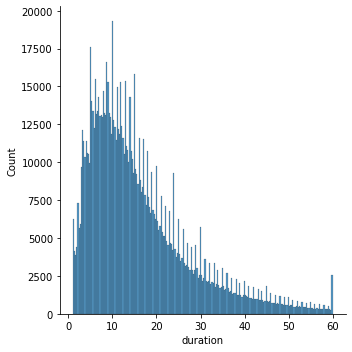

In [9]:
sns.displot(df.duration)

## How many records did you drop?


In [5]:
df_predrop = df.shape[0]
df =df[(df.duration >=1) & (df.duration<=60)]
df_postdrop = df.shape[0]
count = df_predrop - df_postdrop
print(count)

44286


# Q3. Missing values

### What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs


In [6]:
df['PUlocationID'] = df['PUlocationID'].replace(np.nan,-1)

In [7]:
(df['PUlocationID']==-1.0).sum()/df_postdrop

0.8352732770722617

# Q4. One-hot encoding


### What's the dimensionality of this matrix? (The number of columns)


In [10]:
categorical = ['PUlocationID' , 'DOlocationID']

df[categorical]=df[categorical].astype(str)
dv = DictVectorizer()
train_dicts = df[categorical].to_dict(orient='records')
x_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values
x_train.shape


(1109826, 525)


# Q5. Training a model

### What's the RMSE on train?

In [11]:
#training_model part
lr = LinearRegression()
lr.fit(x_train, y_train)

#predicting
y_pred = lr.predict(x_train)

In [13]:
mean_squared_error(y_train,y_pred, squared =False)

10.528519427882047

C:\Users\leear\anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\leear\anaconda3\envs\py39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


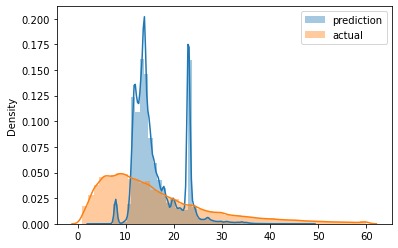

In [15]:
sns.distplot(y_pred , label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

# Q6. Evaluating the model


In [16]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df['duration']=df.dropOff_datetime-df.pickup_datetime
    df.duration = df.duration.apply(lambda td : td.total_seconds()/60)

    df =df[(df.duration >=1) & (df.duration<=60)]
    
    df['PUlocationID'] = df['PUlocationID'].replace(np.nan,-1)
    df['DOlocationID'] = df['DOlocationID'].replace(np.nan,-1)

    categorical = ['PUlocationID' , 'DOlocationID']

    df[categorical]=df[categorical].astype(str)
    
    return df

In [17]:
df_train = read_dataframe('./data/fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/fhv_tripdata_2021-02.parquet')

In [18]:
categorical = ['PUlocationID','DOlocationID'] 

dv = DictVectorizer()

In [19]:
train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')             
X_val = dv.transform(val_dicts)

In [20]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred , squared=False)

11.014285828610237